# Исследование надежности заемщиков

## Подключение библиотек

In [2]:
import pandas as pd
import seaborn as sb
from math import sqrt

## Получение данных

In [3]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

## Изучение данных

In [4]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Количество пропущенных значений для каждого столбца, комбинацией двух методов

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
# Изменил на свой вариант
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
# Изменил на свой вариант
data['days_employed'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('median'))

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

Для каждого задания 19-22 разделим выборку на 2 группы, тех кто "вернул кредит в срок" (`not_debt`) и "не вернул кредит в срок" (`debt`), посчитаем количество наблюдений в каждой группе.

### Делим на группы по задолжности

In [22]:
debt = data[data['debt'] == 1]
not_debt = data[data['debt'] == 0]

# Количество наблюдений каждой из групп
len_debt = len(debt)
len_not_debt = len(not_debt)

print('С задолженностью:', len_debt)
print('Без задолженности:', len_not_debt)

С задолженностью: 1732
Без задолженности: 19616


Далее сгруппируем по нужному признаку, получатся категории по выбранному признаку, посчитаем количество наблюдений в каждой. Затем, рассчитаем относительные величины от общего количества наблюдений в группе. Полученные проценты сравним между собой на графиках. Убедимся что отличия статистически значимые.

### Вспомогательные функции

In [23]:
# https://help.surveymonkey.com/ru/analyze/significant-differences/
def students_t_test(n1, n2, p1, p2) -> bool:
    """
    t-критерий Стьюдента
    Является ли отличие статистически значимым?
    n1, n2 — абсолютные значения в группе
    p1, p2 — процент от общего количества в группе
    
    Пример:
    n1 = 1063
    n2 = 13044
    p1 = 0.6137
    p2 = 0.6649
    students_t_test(n1, n2, p1, p2)
    // True (t_abs=3.3910)
    """
    a1 = p1 * n1
    b1 = p2 * n2
    if n1 != 0 and n2 != 0:
        p = (a1 + b1) / (n1 + n2)
        se = sqrt((p*(1-p))*(1/n1+1/n2))
        t = (p1 - p2) / se
        t_abs = abs(t)
        r = t_abs > 1.96
        return r
    return False

In [24]:
def t_test_for_lists(row) -> list:
    """
    Тест на t-критерий Стюдента по спискам
    """
    return students_t_test(row['debt_count'], row['not_debt_count'], row['relative_debt'], row['relative_not_debt'])

In [25]:
def bar_labels(plot, labels):
    """
    Подписи к столбцам столбчатой диаграммы
    """
    for i, j in zip(plot.ax.patches, range(len(labels))):
        plot.ax.text(i.get_width()+0.005, i.get_y()+.49, f'{labels[j]:.2%}', fontsize=15)

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

### Зависимость между количеством детей и возвратом кредита в срок

#### Получаем относительные величины

In [26]:
debt_by_children = debt.groupby('children').count()['debt'] / len_debt
not_debt_by_children = not_debt.groupby('children').count()['debt'] / len_not_debt

#### Проверяем значения

In [27]:
pd.DataFrame({
    'debt': debt.groupby('children').count()['debt'],
    'not_debt': not_debt.groupby('children').count()['debt']
})

,debt,not_debt
children,,
0,1063.0,13044
1,444.0,4365
2,194.0,1858
3,27.0,303
4,4.0,37
5,NaN,9


Дополняем нулём недостающие данные (должников с 5-ю детьми нету)

In [28]:
debt_by_children[5] = 0

#### Формируем таблицу

In [51]:
data['children_group'] = data['children'].apply(lambda x: 'Нет детей' if x == 0 else 'Дети есть')

df_example = data.groupby('children_group')['debt'].agg(['count', 'sum', 'mean', lambda x: 1 - x.mean()])
df_example.columns = ['Кол-во пользователей', 'Кол-во должников', '% должников', '% НЕдолжников']
df_example.style.format({'% должников': '{:.2%}', '% НЕдолжников': '{:.2%}'})

,Кол-во пользователей,Кол-во должников,% должников,% НЕдолжников
children_group,,,,
Дети есть,7241,669,9.24%,90.76%
Нет детей,14107,1063,7.54%,92.46%


In [30]:
children2 = pd.DataFrame({
    'childrens': debt_by_children.index,
    'debt_count': list(debt.groupby('children').count()['debt'].values) + [0],
    'not_debt_count': not_debt.groupby('children').count()['debt'].values,
})

# Количество заёмщиков в группе
children2['debitors_count'] = children2['debt_count'] + children2['not_debt_count']

# Получаем относительные величины в группе — процент должников
children2['relative_debt'] = children2['debt_count'] / children2['debitors_count']

# Сортируем по убыванию процента должников
children2 = children2.sort_values(by='relative_debt', ascending=False)

children2

,childrens,debt_count,not_debt_count,debitors_count,relative_debt
4,4,4,37,41,0.097561
2,2,194,1858,2052,0.094542
1,1,444,4365,4809,0.092327
3,3,27,303,330,0.081818
0,0,1063,13044,14107,0.075353
5,5,0,9,9,0.000000


#### График

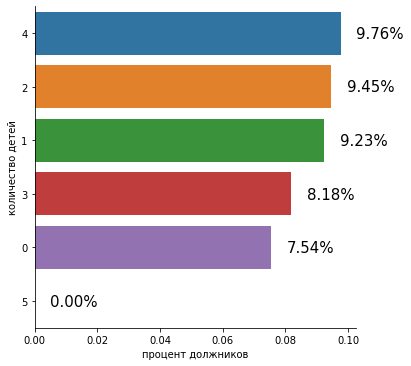

In [32]:
children2_plot = sb.catplot(
    kind="bar",
    data=pd.DataFrame({
        'количество детей': children2.index,
        'процент должников': children2['relative_debt'],
    }),
    x='процент должников', y='количество детей', orient='h', order=children2.index 
);

# Подписываем столбцы
bar_labels(children2_plot, list(children2['relative_debt']))

#### Вывод

Выгода убывает по количеству детей в таком порядке: `5`, `0`, `3`, `1`, `4`. Группа c `5` детьми очень мала.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

### Зависимость между семейным положением и возвратом кредита в срок

#### Формируем таблицу

In [34]:
family_status2 = data.pivot_table(index=['family_status'], columns='debt', values='children', aggfunc='count')

# Количество заёмщиков в группе
family_status2['debitors_count'] = family_status2[0] + family_status2[1]

# Получаем относительные величины в группе — процент должников
family_status2['relative_debt'] = family_status2[1] / family_status2['debitors_count']

# Сортируем по убыванию процента должников
family_status2 = family_status2.sort_values(by='relative_debt', ascending=False)

family_status2

debt,0,1,debitors_count,relative_debt
family_status,,,,
Не женат / не замужем,2523,273,2796,0.097639
гражданский брак,3761,385,4146,0.092861
женат / замужем,11339,927,12266,0.075575
в разводе,1105,84,1189,0.070648
вдовец / вдова,888,63,951,0.066246


#### График

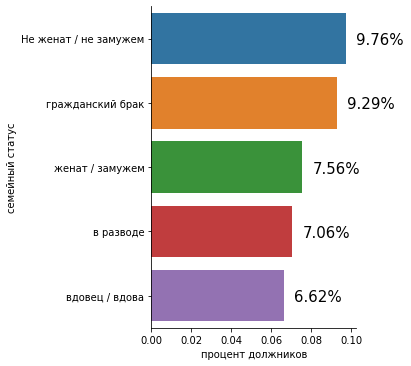

In [38]:
family_status2_plot = sb.catplot(
    kind="bar",
    data=pd.DataFrame({
        'семейный статус': family_status2.index,
        'процент должников': family_status2['relative_debt'],
    }),
    x='процент должников', y='семейный статус', orient='h', order=family_status2.index 
);

# Подписываем столбцы
bar_labels(family_status2_plot, list(family_status2['relative_debt']))

#### Вывод

Выгода убывает по семейному статусу в таком порядке: `вдовец / вдова`, `в разводе`, `женат / замужем`, `гражданский брак`, `не женат / не замужем`.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

### Зависимость между уровнем дохода и возвратом кредита в срок

#### Формируем таблицу

In [40]:
total_income_category2 = data.pivot_table(index=['total_income_category'], columns='debt', values='children', aggfunc='count')

# Количество заёмщиков в группе
total_income_category2['debitors_count'] = total_income_category2[0] + total_income_category2[1]

# Получаем относительные величины в группе — процент должников
total_income_category2['relative_debt'] = total_income_category2[1] / total_income_category2['debitors_count']

# Сортируем по убыванию процента должников
total_income_category2 = total_income_category2.sort_values(by='relative_debt', ascending=False)

total_income_category2

debt,0,1,debitors_count,relative_debt
total_income_category,,,,
E,20,2,22,0.090909
C,14585,1353,15938,0.084891
A,23,2,25,0.080000
B,4660,354,5014,0.070602
D,328,21,349,0.060172


#### График

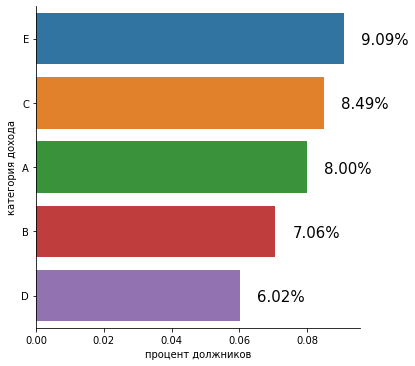

In [44]:
total_income_category2_plot = sb.catplot(
    kind="bar",
    data=pd.DataFrame({
        'категория дохода': total_income_category2.index,
        'процент должников': total_income_category2['relative_debt'],
    }),
    x='процент должников', y='категория дохода', orient='h', order=total_income_category2.index 
);

# Подписываем столбцы
bar_labels(total_income_category2_plot, list(total_income_category2['relative_debt']))

#### Вывод

Выгода убывает по категории дохода в таком порядке: `D` (`30001–50000`), `B` (`200001–1000000`), `A` (`1000001 и выше`), `C` (`50001–200000`), `E` (`0–30000`).

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

### Влияние целей кредита на его возврат в срок

#### Формируем таблицу

In [46]:
purpose2 = data.pivot_table(index=['purpose_category'], columns='debt', values='children', aggfunc='count')

# Количество заёмщиков в группе
purpose2['debitors_count'] = purpose2[0] + purpose2[1]

# Получаем относительные величины в группе — процент должников
purpose2['relative_debt'] = purpose2[1] / purpose2['debitors_count']

# Сортируем по убыванию процента должников
purpose2 = purpose2.sort_values(by='relative_debt', ascending=False)

purpose2

debt,0,1,debitors_count,relative_debt
purpose_category,,,,
операции с автомобилем,3881,400,4281,0.093436
получение образования,3620,369,3989,0.092504
проведение свадьбы,2141,183,2324,0.078744
операции с недвижимостью,9974,780,10754,0.072531


#### График

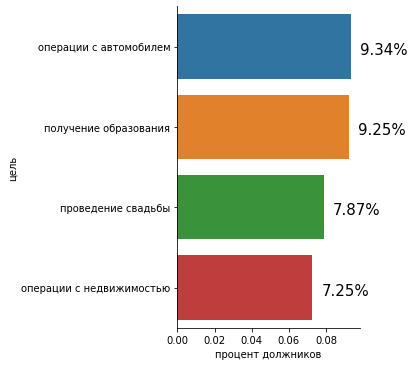

In [50]:
purpose2_plot = sb.catplot(
    kind="bar",
    data=pd.DataFrame({
        'цель': purpose2.index,
        'процент должников': purpose2['relative_debt'],
    }),
    x='процент должников', y='цель', orient='h', order=purpose2.index 
);

# Подписываем столбцы
bar_labels(purpose2_plot, list(purpose2['relative_debt']))

#### Вывод

Выгода убывает по категории дохода в таком порядке: `операции с недвижимостью`, `проведение свадьбы`, `получение образования`, `операции с автомобилем`.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:*  
Человеческий фактор или технические причины:
- нет проверки значений при вводе в форму
- нет установленного формата ввода каждого значения
- не указаны обязательные поля формы
- человек мог ошибиться с вводом значения
- программа выдала пустое, некорректное или другое подобное значение

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* Медиана в отличии от среднего более корректна если в данных находятся сильно выбивающиеся значения относительно остальных.

## Общий вывод.

Для построения модели *кредитного скоринга* для оценки способности потенциального заёмщика вернуть кредит банку следует учитывать что:
- Выгода убывает по количеству детей в таком порядке: `5`, `0`, `3`, `1`, `4`. Группа c `5` детьми очень мала.
- Выгода убывает по семейному статусу в таком порядке: `вдовец / вдова`, `в разводе`, `женат / замужем`, `гражданский брак`, `не женат / не замужем`.
- Выгода убывает по категории дохода в таком порядке: `D` (`30001–50000`), `B` (`200001–1000000`), `A` (`1000001 и выше`), `C` (`50001–200000`), `E` (`0–30000`).
- Выгода убывает по цели в таком порядке: `операции с недвижимостью`, `проведение свадьбы`, `получение образования`, `операции с автомобилем`.

Таким образом портрет заёмщика который вернёт кредит в срок с наибольшей вероятностью такой: с 5-ю или без детей, вдовец / вдова, находится в категории "D" с доходом `30001–50000`, цель кредита "операции с недвижимостью".  
А для наименьшей вероятности вернуть кредит в срок такой: с 4-мя детьми, не женат / не замужем, находится в категории "E" с доходом 30001–50000, операции с автомобилем.